<a href="https://colab.research.google.com/github/Mal-Lem/Cluster_KMeans/blob/main/Customer_Segmentation_k_means_and_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data
df = pd.read_csv('Mall_Customers.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Duplicates check
df.duplicated().sum()

0

In [6]:
# Data types check
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Numerical variable description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Missing values check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

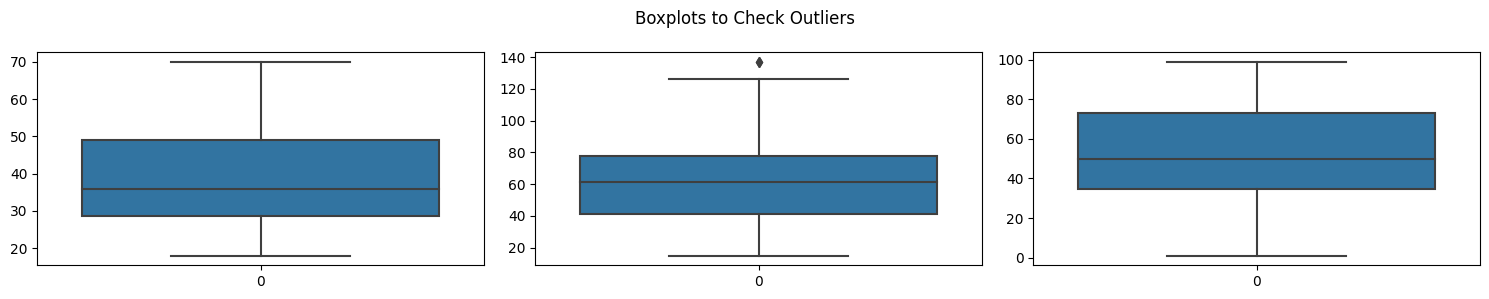

In [9]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

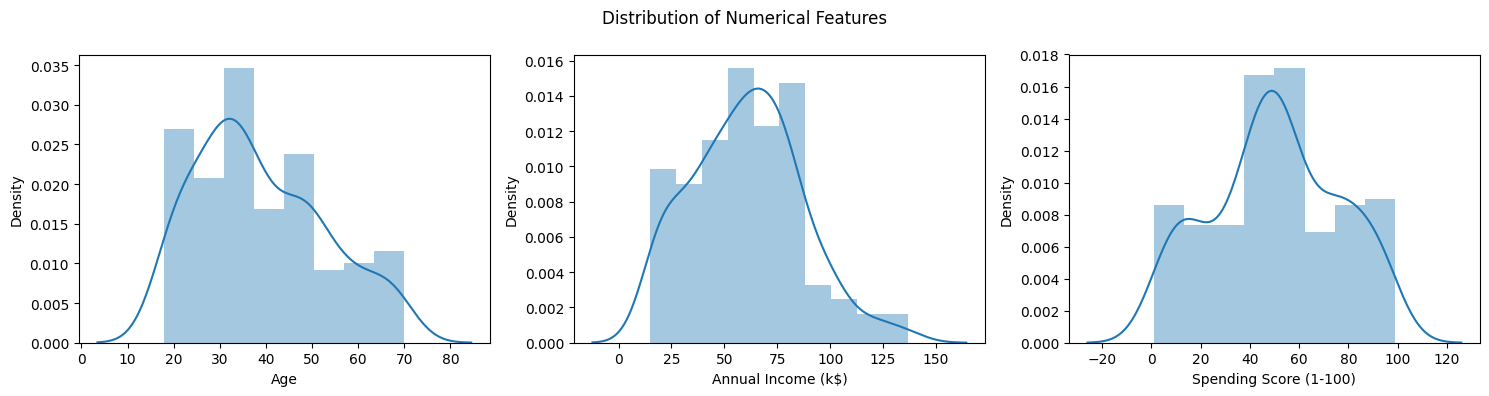

In [10]:
# Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [11]:
# Feature Selection
df_fs = df.drop(columns='CustomerID')

# Label Encoding
df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})

# Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded)

X[:5, :]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

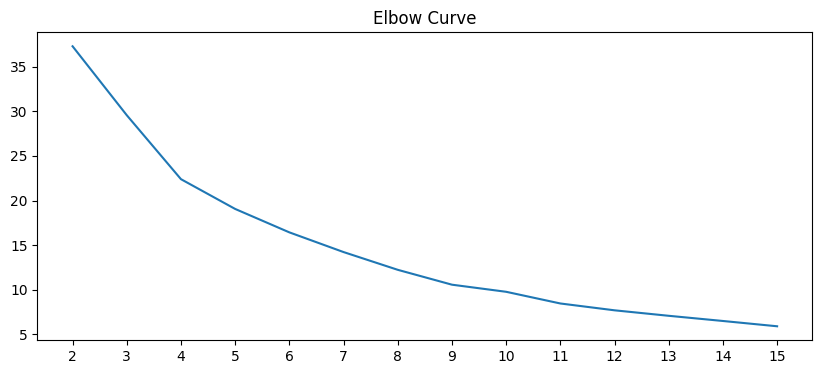

In [12]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

In [13]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


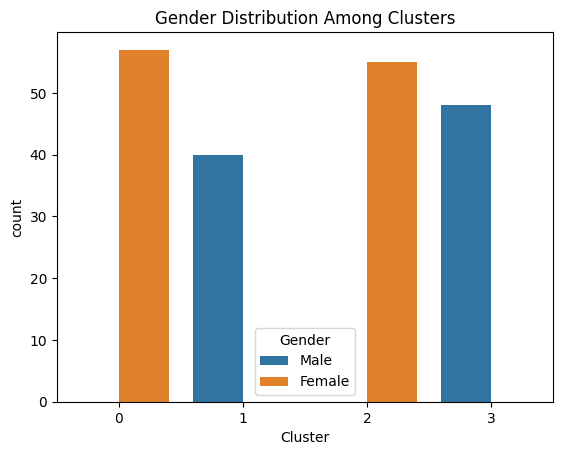

In [14]:
# Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

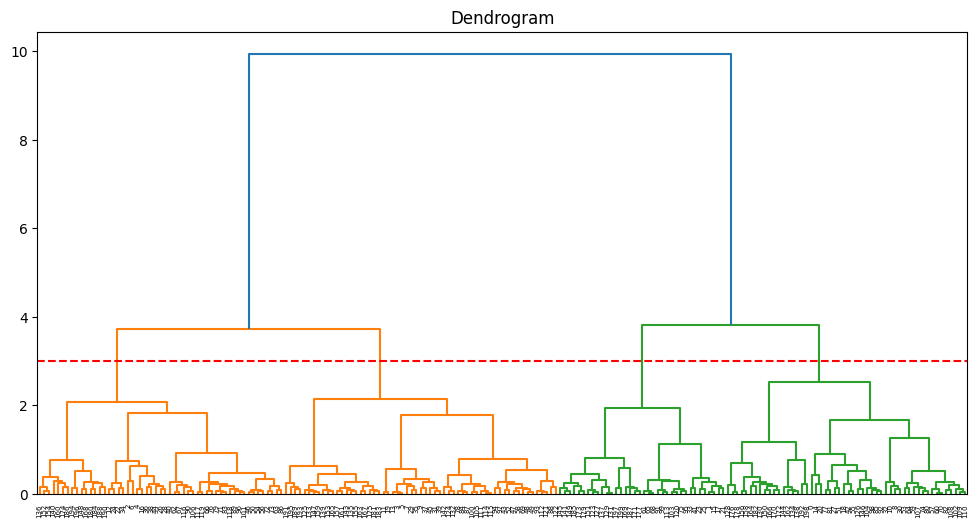

In [15]:
# Plotting dendrogram to identify optimum no. of clusters
mergings = linkage(X, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()

In [16]:
# Agglomerative clustering with 4 clusters
aggclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
aggclust.fit(X)

# Labeling the data
df_agg = df.copy()
df_agg['Cluster'] = aggclust.labels_
df_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


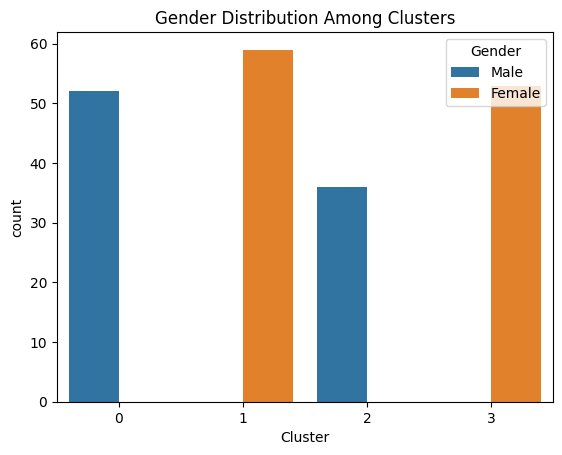

In [17]:
# Categorical variable distribution among clusters
sns.countplot(data=df_agg, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()